# Исследование рынка видеоигр 

В нашем распоряжении данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до 2016 года. Нам нужно провести исследование для международного магазина видеоигр: на исторических данных выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Изучение данных из файла

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.display import display_html
import seaborn as sns
pd.set_option('display.max_columns', 30)
pd.set_option("display.float_format", "{:.2f}".format)

In [2]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('../../yandex-praktikum-sources/games.csv')

In [3]:
display(df.head(20))
display(df.info())
display(df.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]).T)

Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii          2006.00   
1                              Super Mario Bros.      NES          1985.00   
2                                 Mario Kart Wii      Wii          2008.00   
3                              Wii Sports Resort      Wii          2009.00   
4                       Pokemon Red/Pokemon Blue       GB          1996.00   
5                                         Tetris       GB          1989.00   
6                          New Super Mario Bros.       DS          2006.00   
7                                       Wii Play      Wii          2006.00   
8                      New Super Mario Bros. Wii      Wii          2009.00   
9                                      Duck Hunt      NES          1984.00   
10                                    Nintendogs       DS          2005.00   
11                                 Mario Kart DS       DS          2005.00   
12                   Pokemon Gold/Pokemon Silver       GB          1999.00   
13                                       Wii Fit      Wii          2007.00   
14                            Kinect Adventures!     X360          2010.00   
15                                  Wii Fit Plus      Wii          2009.00   
16                            Grand Theft Auto V      PS3          2013.00   
17                 Grand Theft Auto: San Andreas      PS2          2004.00   
18                             Super Mario World     SNES          1990.00   
19  Brain Age: Train Your Brain in Minutes a Day       DS          2005.00   

           Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
0         Sports     41.36     28.96      3.77         8.45         76.00   
1       Platform     29.08      3.58      6.81         0.77           NaN   
2         Racing     15.68     12.76      3.79         3.29         82.00   
3         Sports     15.61     10.93      3.28         2.95         80.00   
4   Role-Playing     11.27      8.89     10.22         1.00           NaN   
5         Puzzle     23.20      2.26      4.22         0.58           NaN   
6       Platform     11.28      9.14      6.50         2.88         89.00   
7           Misc     13.96      9.18      2.93         2.84         58.00   
8       Platform     14.44      6.94      4.70         2.24         87.00   
9        Shooter     26.93      0.63      0.28         0.47           NaN   
10    Simulation      9.05     10.95      1.93         2.74           NaN   
11        Racing      9.71      7.47      4.13         1.90         91.00   
12  Role-Playing      9.00      6.18      7.20         0.71           NaN   
13        Sports      8.92      8.03      3.60         2.15         80.00   
14          Misc     15.00      4.89      0.24         1.69         61.00   
15        Sports      9.01      8.49      2.53         1.77         80.00   
16        Action      7.02      9.09      0.98         3.96         97.00   
17        Action      9.43      0.40      0.41        10.57         95.00   
18      Platform     12.78      3.75      3.54         0.55           NaN   
19          Misc      4.74      9.20      4.16         2.04         77.00   

   User_Score Rating  
0           8      E  
1         NaN    NaN  
2         8.3      E  
3           8      E  
4         NaN    NaN  
5         NaN    NaN  
6         8.5      E  
7         6.6      E  
8         8.4      E  
9         NaN    NaN  
10        NaN    NaN  
11        8.6      E  
12        NaN    NaN  
13        7.7      E  
14        6.3      E  
15        7.4      E  
16        8.2      M  
17          9      M  
18        NaN    NaN  
19        7.9      E

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

count    mean   std     min      5%     25%     50%  \
Year_of_Release 16446.00 2006.48  5.88 1980.00 1996.00 2003.00 2007.00   
NA_sales        16715.00    0.26  0.81    0.00    0.00    0.00    0.08   
EU_sales        16715.00    0.15  0.50    0.00    0.00    0.00    0.02   
JP_sales        16715.00    0.08  0.31    0.00    0.00    0.00    0.00   
Other_sales     16715.00    0.05  0.19    0.00    0.00    0.00    0.01   
Critic_Score     8137.00   68.97 13.94   13.00   43.00   60.00   71.00   

                    75%     95%     99%     max  
Year_of_Release 2010.00 2015.00 2016.00 2016.00  
NA_sales           0.24    1.06    2.79   41.36  
EU_sales           0.11    0.62    1.94   28.96  
JP_sales           0.04    0.36    1.27   10.22  
Other_sales        0.03    0.20    0.63   10.57  
Critic_Score      79.00   89.00   94.00   98.00

In [4]:
df.duplicated().sum() # явных дубликатов в таблице нет

0

Файл содержит информацию о 16715 играх. Согласно документации к данным:
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

На данном этапе уже можно увидеть проблемы в данных. Посмотрим на них поближе и исправим.

## Подготовка данных

### Заголовки столбцов
Названия столбцов не соответствуют snake case. Приведем все к нижнему регистру.   

In [5]:
df.columns = [x.lower() for x in df.columns.values]

### Пропуски

В столбце `name` имеются пропуски. Эти строчки придется удалить.

In [6]:
df[df['name'].isna()] # посмотрим, что же там было

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN          1993.00   NaN      1.78      0.53      0.00   
14244  NaN      GEN          1993.00   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

In [7]:
df = df.dropna(subset=['name']).reset_index(drop=True) # и удалим

Пропуски в остальных столбцах мы заменять не будем, чтобы не искажать данные. Строки с пропущенным годом релиза удалим, их меньше 300 штук (около 1.6% от всего объема данных)

In [8]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

В столбце `user_score` кроме числовых значений и NaN есть и другие значения:

In [9]:
(df[df['user_score'].notna()]['user_score'].sort_values(ascending=False).unique())

array(['tbd', '9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9', '8.9',
       '8.8', '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8', '7.9',
       '7.8', '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1', '7', '6.9',
       '6.8', '6.7', '6.6', '6.5', '6.4', '6.3', '6.2', '6.1', '6', '5.9',
       '5.8', '5.7', '5.6', '5.5', '5.4', '5.3', '5.2', '5.1', '5', '4.9',
       '4.8', '4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4', '3.9',
       '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3', '2.9',
       '2.8', '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2', '1.9',
       '1.8', '1.7', '1.6', '1.5', '1.4', '1.3', '1.2', '1.1', '1', '0.9',
       '0.7', '0.6', '0.5', '0.3', '0.2', '0'], dtype=object)

Аббревиатура "tbd" означает "to be defined" - предстоит определить, то есть на данный момент это пропуск в данных. Заменим на их на NaN.

In [10]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan')

Пропуски в рейтинге ESRB заменим на аббревиатуру ND - не определен. Устаревшую аббревиатуру "K-A" заменим на современное обозначение "E".

In [11]:
df['rating'] = df['rating'].fillna(value='ND')
df['rating'] = df['rating'].replace('K-A', 'E')

Пропуски в столбцах рейтингов критиков и пользователей оставим без изменений. Они связаны, вероятно, с тем, что не каждая игра удостаивалась внимания критиков или доходила до широких международных рынков, а также с региональными особенностями. 

### Замена типов данных
Год выпуска сохранен с плавающей точкой, хотя никаких дробных частей в годах нет. Приведем их к целочисленному типу. 

Ранее замененные на NaN тектовые значения в столбце `user_score` приведем к дробным числам.

In [12]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['user_score'] = df['user_score'].astype(float)

### Мировые продажи

Создадим столбец с суммарными продажами во всех регионах

In [13]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### Типы платформ и компании-производители

Для дальнейшего анализа добавим столбец с типом платформы - стационарная консоль, портативная или ПК, и столбец с наименованием компании-производителя консоли. Для этого напишем небольшие функции. 

In [14]:
# типы платформ
def platform_type(platform):
    mobile = ['GB', 'DS', 'GBA', '3DS', 'PSP', 'PSV', 'GG']
    stationary = ['Wii', 'NES', 'X360', 'PS3', 'PS2', 'SNES', 'PS4', 'N64', 'PS', 'XB', '2600', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'SAT', 'SCD', 'WS', 'NG', 'TG16','3DO', 'PCFX']
    if platform in mobile:
        platform_type = 'mobile'
    if platform in stationary:
        platform_type = 'stationary' 
    if platform == 'PC':
        platform_type = 'PC'
    return platform_type
df['platform_type'] = df['platform'].apply(platform_type)

In [15]:
# производители консолей
def company_name(platform):
    companies = {'Atary' : ['2600'], 
                'Bandai' : ['WS'],
                'Microsoft' : ['X360', 'XOne', 'XB'],
                'NEC' : ['TG16', 'PCFX'],
                'Nintendo' : ['N64', '3DS', 'Wii', 'WiiU', 'NES', 'SNES', 'GB', 'GC', 'DS', 'GBA'],
                'Sega' : ['GG', 'GEN', 'SAT', 'DC', 'SCD'],
                'Sony' : ['PS', 'PS2', 'PS3', 'PS4', 'PSV', 'PSP'],
                'Panasonic' : ['3DO'],
                'SNK' : ['NG'],
                'PC' : ['PC']
                }
    for key, value in companies.items():
        if platform in value:
            return key
df['company'] = df['platform'].apply(company_name)

In [16]:
df.info() # проверим, что получилось

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
 12  platform_type    16444 non-null  object 
 13  company          16444 non-null  object 
dtypes: float64(7), int32(1), object(6)
memory usage: 1.7+ MB


### Вывод

Мы привели имена столбцов к snake_case, привели данные в двух столбцах к целочисленному типу и избавились от записей с критичными пропусками в данных - названием и годом выпуска, а также добавили новые столбцы - подсчитали суммарный объем продаж во всех регионах, добавили информацию о типе и производителе консолей. Всего из 16715 строк осталось 16444. 

## Исследовательский анализ данных

### Выпуск игр в разные годы

Посмотрим, какое количество релизов и продаж было в разные годы, и построим график.

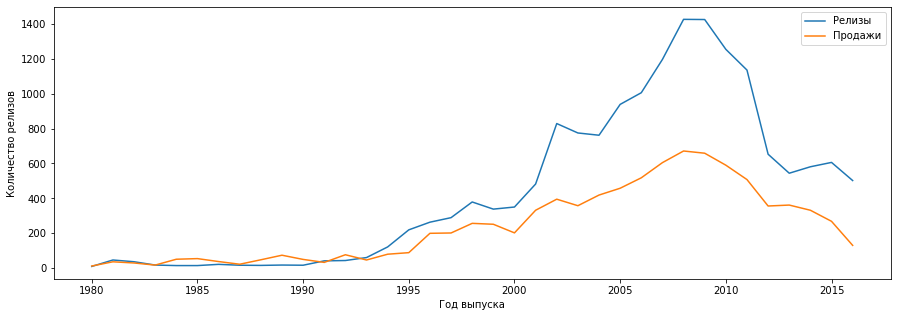

In [17]:
plt.figure(figsize=(15,5))
plt.plot(df.groupby('year_of_release')['name'].count(), label='Релизы')
plt.plot(df.groupby('year_of_release')['total_sales'].sum(), label='Продажи')
plt.legend()
plt.xlabel('Год выпуска')
plt.ylabel('Количество релизов')
plt.show()

In [18]:
df.groupby('year_of_release')['name'].count().sort_values(ascending=False).head(10) # посмотрим на топ годов

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
Name: name, dtype: int64

In [19]:
df.groupby('year_of_release')['name'].count().sort_values(ascending=False).tail(15) # посмотрим на хвост годов

year_of_release
1994    121
1993     60
1981     46
1992     43
1991     41
1982     36
1986     21
1989     17
1983     17
1990     16
1987     16
1988     15
1985     14
1984     14
1980      9
Name: name, dtype: int64

В 2000-х годах наступает настоящий расцвет видеоигр, и количество релизов достигает максимума - более чем 1400 в 2008-2009 
годах. 

До 1994 года количество релизов в год не превышало 100, и эти данные сложно назвать актуальными. Взлет начинается в 1994 году, возможно, с удешевлением гаджетов и их повсеместным распространением. 

Посмотрим, как менялось количество выпущенных игр год от года на различных типах платформ.

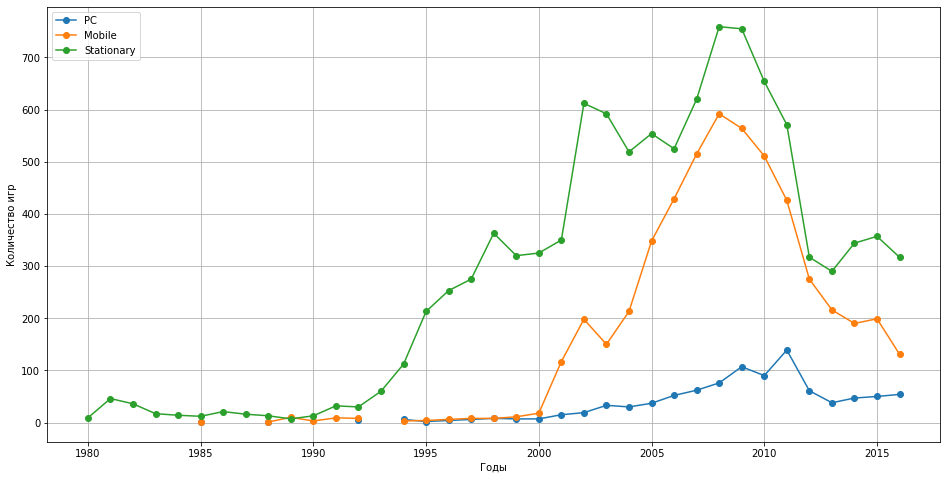

In [20]:
# сводная таблица - количество релизов по годам
platform_type_releases = df.pivot_table(index='platform_type', values = 'name', columns='year_of_release', aggfunc='count').T
# построим график
plt.figure(figsize=(16, 8))
plt.plot(platform_type_releases['PC'], marker ='o', label='PC')
plt.plot(platform_type_releases['mobile'], marker ='o', label='Mobile')
plt.plot(platform_type_releases['stationary'], marker ='o', label='Stationary')
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.grid()
plt.legend(loc='upper left')
plt.show()

Так как до 1994 года количество релизов совсем небольшое (менее 100 в год), а прошло более 20 лет - эти данные можно счесть устаревшими и не рассматривать далее.

In [21]:
# создадим новую таблицу с данными от 94 года и позднее
df_94 = df[df['year_of_release'] > 1993]

### Продажи и релизы по платформам

Посмотрим, как выходили  игры на разных платформах. Создадим сводную таблицу и отфильтруем те платформы, на которых вышло хотя бы 50 игр.  Подсветим таблицу так, чтобы увидеть таймлайны разных платформ. 

In [22]:
platform_releases = df_94.pivot_table(index='platform', 
                                      values='total_sales', 
                                      columns = 'year_of_release', 
                                      aggfunc = 'count', 
                                      fill_value=0, 
                                      margins=True).reset_index()
platform_releases = platform_releases[:-1]
platform_releases = platform_releases.rename_axis('index',  axis="columns")

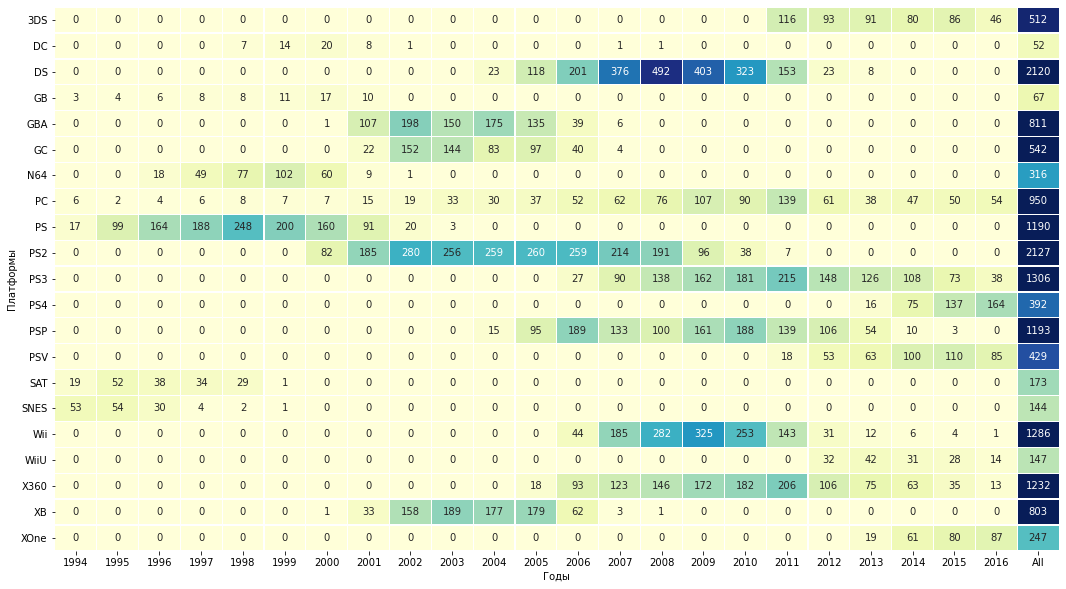

In [23]:
platform_releases_heatmap = platform_releases.query('All > 50').set_index('platform')
plt.figure(figsize=(18, 10))
sns.heatmap(platform_releases_heatmap, annot=True, fmt="d", cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.xlabel('Годы')
plt.ylabel('Платформы')
plt.show()

In [24]:
# топ платформ по количеству выпущенных игр
platforms_top_releases = list(platform_releases.sort_values(by='All', ascending=False)['platform'].head(10))
platform_releases.sort_values(by='All', ascending=False)[['platform', 'All']].head(10)

index platform   All
14         PS2  2127
3           DS  2120
15         PS3  1306
24         Wii  1286
26        X360  1232
17         PSP  1193
13          PS  1190
11          PC   950
5          GBA   811
27          XB   803

Повторим то же самое, но с объемами продаж. Ограничимся платформами, для которых было продано хотя бы 10 миллионов копий игр.

In [25]:
platform_sales = df_94.pivot_table(index='platform', 
                                      values='total_sales', 
                                      columns = 'year_of_release', 
                                      aggfunc = 'sum', 
                                      fill_value=0, 
                                      margins=True).reset_index()
platform_sales = platform_sales[:-1]
platform_sales = platform_sales.rename_axis('index',  axis="columns")

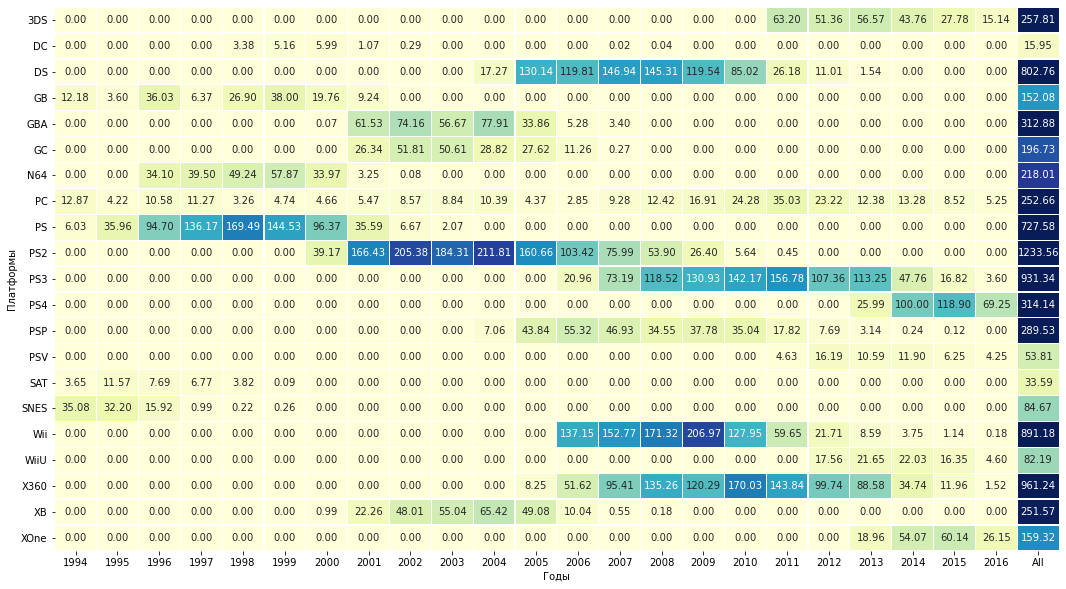

In [26]:
platform_sales_heatmap = platform_sales.query('All > 10').set_index('platform')
plt.figure(figsize=(18, 10))
sns.heatmap(platform_sales_heatmap, annot=True, fmt=".2f", cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.xlabel('Годы')
plt.ylabel('Платформы')
plt.show()

In [27]:
# топ платформ по количеству проданных игр
platforms_top_sales = list(platform_sales.sort_values(by='All', ascending=False)['platform'].head(10))
platform_sales.sort_values(by='All', ascending=False)[['platform', 'All']].head(10)

index platform     All
14         PS2 1233.56
26        X360  961.24
15         PS3  931.34
24         Wii  891.18
3           DS  802.76
13          PS  727.58
16         PS4  314.14
5          GBA  312.88
17         PSP  289.53
1          3DS  257.81

### Топ платформ

Списки топовых по продажам и по релизам платформ почти полностью совпадают. Объединим их в один общий топ платформ, и построим графики - как выходили и продавались игры по годам. В данном исследовании у нас нет подробных данных об объемах продаж каждой игры по годам - будем считать, что основные продажи приходятся на год выхода.

In [28]:
top_platforms = list(set(platforms_top_releases + platforms_top_sales))

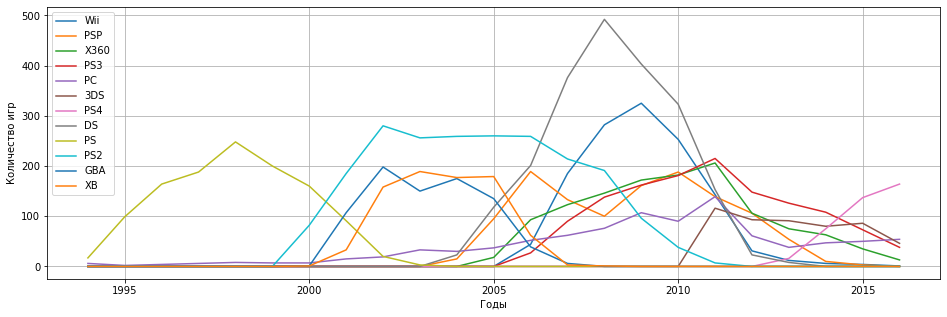

In [29]:
# графики выходов игр на самых популярных платформах
plt.figure(figsize=(16, 5))
for i in top_platforms:
    plt.plot(platform_releases.loc[platform_releases['platform'] == i, list(platform_releases.columns[1:-1])].T, label=i)
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.grid()
plt.legend(loc='upper left')
plt.show()

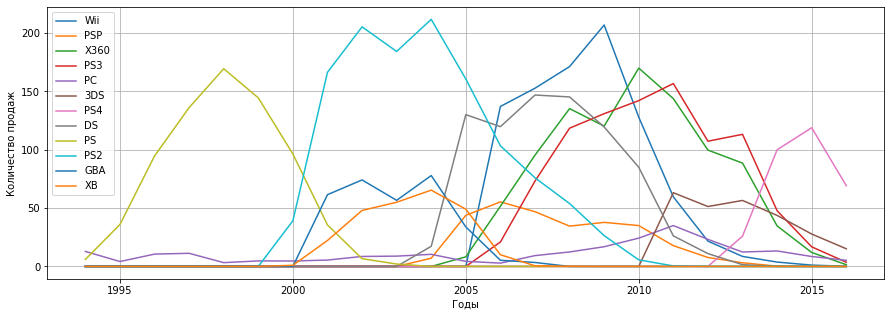

In [30]:
# графики продаж игр на самых популярных платформах
plt.figure(figsize=(15, 5))
for i in top_platforms:
    plt.plot(platform_sales.loc[platform_sales['platform'] == i, list(platform_sales.columns[1:-1])].T, label=i)
plt.xlabel('Годы')
plt.ylabel('Количество продаж')
plt.grid()
plt.legend(loc='upper left')
plt.show()

Формы графиков достаточно похожи, что логично - чем больше ассортимент, тем больше валовые продажи.

### Оценка продолжительности жизни платформ

На основе данных за все время составим таблицу продолжительности их жизни. Сравним, как долго живут популярные и не очень платформы. При подсчете длины жизни добавим одиницу - без точных дат релизов условно будем считать, что самая первая игра выходит 1 января, а последняя 31 декабря. Так при разности в 1 год длительность равна уже 2 годам, а платформы, где и первая, и последняя игры вышли в один и тот же год, все-таки проживут не ноль лет, а 1 год. 

In [31]:
# создадим сводную таблицу
life_time = df.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
# переименуем столбцы для простоты
life_time.set_axis(['platform', 'first_year', 'last_year'], axis='columns', inplace=True)
# при подсчете длины жизни добавим одиницу
life_time['length'] = life_time.last_year - life_time.first_year + 1
display(life_time['length'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]))
display(life_time[life_time['length'] == 32])

count   31.00
mean     8.61
std      7.00
min      1.00
5%       1.00
25%      4.00
50%      7.00
75%     11.00
95%     21.50
99%     31.10
max     32.00
Name: length, dtype: float64

platform  first_year  last_year  length
13       PC        1985       2016      32

На всех данных средняя продолжительность составляет почти 9 лет, медианная - 7. Платформа-долгожитель - персональный компьютер, 32 года. Консоли приходят и уходят, десктопы продолжают жить.

Сравним эти цифры с самыми популярными платформами.

In [32]:
life_time.query('platform in @top_platforms')['length'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99])

count   12.00
mean    13.00
std      8.57
min      4.00
5%       5.10
25%      8.75
50%     11.00
75%     12.00
95%     30.35
99%     31.67
max     32.00
Name: length, dtype: float64

Для самых популярных платформ средняя продолжительность составляет 13 лет, медианная - 11. ПК входит в топ и немного сдвигает среднее значение.

Подсчитаем время жизни платформы другим способом - как число лет, когда продажи превышают 5 млн копий.

In [33]:
actual_period = df.groupby(['platform','year_of_release']).agg({'total_sales': 'sum'}).query('platform in @top_platforms and total_sales > 5')
actual_period = actual_period.reset_index().groupby('platform').agg({'year_of_release': 'count'})

actual_period.mean()

year_of_release   8.83
dtype: float64

Разница получилась не такая большая, но заметная. Итак, средняя жизнь платформы составляет 9-11 лет, пик популярности (исходя из графиков) приходится примерно на середину этого срока. 

Таким образом, нас точно не интересуют платформы, продаж и релизов для которых не было в последний год - скорее всего, они умерли окончательно, возвращений после полного упадка практически не случается. Кроме того, платформы старше 10 лет доживают свой век, и скорее всего в следующем году продажи для них будут крайне низкими - стоит смотреть в сторону тех, что вышли не более 5 лет назад и не перевалили за экватор средне-консольной продолжительности жизни. 

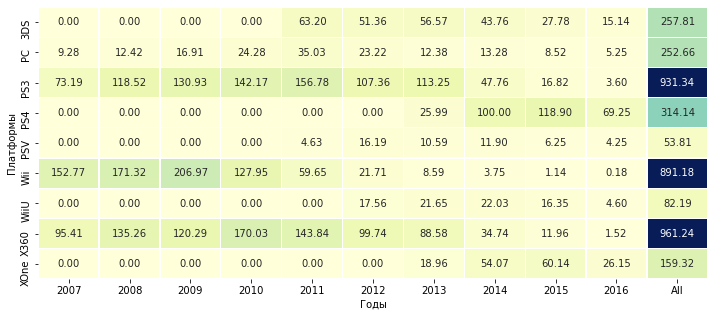

In [34]:
# посмотрим, у каких платформ были хотя бы какие-то продажи в 2016 году 
platform_sales_heatmap = platform_sales.loc[platform_sales[2016] != 0, 
                   ['platform', 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 'All']].set_index('platform')

plt.figure(figsize=(12, 5))
sns.heatmap(platform_sales_heatmap, annot=True, fmt=".2f", cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.xlabel('Годы')
plt.ylabel('Платформы')
plt.show()

In [35]:
# посмотрим на самые молодые платформы
life_time.query('last_year == 2016 and first_year > 2011')['platform']

18     PS4
27    WiiU
30    XOne
Name: platform, dtype: object

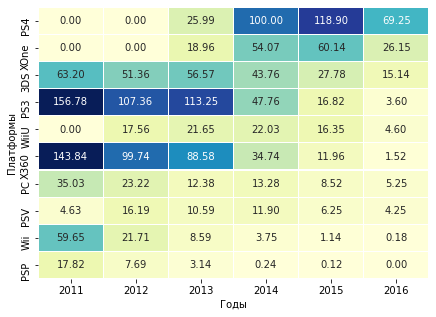

In [36]:
# посмотрим на топ-2015 (согласно документаци, данные за 2016 неполные)
platform_sales_heatmap = platform_sales.sort_values(by=2015, ascending=False)[['platform', 2011, 2012, 2013, 2014, 2015, 2016]].head(10).set_index('platform')

plt.figure(figsize=(7, 5))
sns.heatmap(platform_sales_heatmap, annot=True, fmt=".2f", cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.xlabel('Годы')
plt.ylabel('Платформы')
plt.show()

Из всех этих данных в видно, что PlayStation 4, WiiU, XBox One находятся на подъеме, Nintendo 3DS, XBox 360, PlayStation 3 и PlayStation Vita миновали пик популярности, Wii и PSP отжили свое, а персональные компьютеры стабильно держатся на плаву. 

Для дальнейшего анализа оставим наиболее перспективные платформы - PlayStation 4, WiiU, XBox One и PC, а также еще не лишенную потенциала Nintendo 3DS. и будем опираться на данные с 2013 года, как наиболее актуальные (год, когда все платформы, принятые нами как актуальные, уже вышли).

In [37]:
df_actual = df.query('platform in ["PS4", "WiiU", "XOne", "PC", "3DS"] and year_of_release > 2012') 

In [38]:
# сохраним список актуальных платформ на будущее и обрежем данные 2013 годом
actual_platforms = ["PS4", "WiiU", "XOne", "PC", "3DS"]
df_actual = df.query('year_of_release > 2012') 

Построим диаграммы размаха для выбранных платформ за выбранное время. 

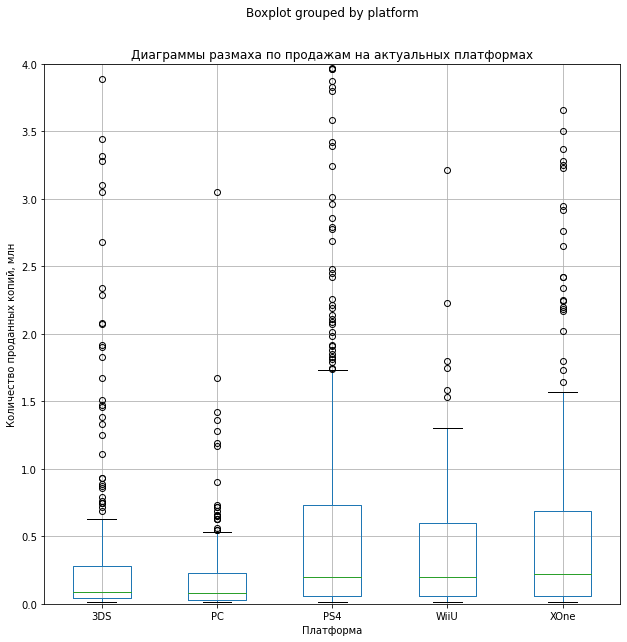

In [39]:
(df_actual.query('platform in @actual_platforms')[['platform', 'name', 'total_sales']]
 .boxplot(column='total_sales', by='platform', figsize=(10,10))
)
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам на актуальных платформах')
plt.ylim(0, 4)
plt.show()

In [40]:
# посмотрим на то же самое, но в табличке
display(df_actual.query('platform in @actual_platforms')
        .pivot_table(index='platform', values='total_sales', aggfunc=['sum', 'mean', 'median', 'std', 'count'])
        .sort_values(('median', 'total_sales'), ascending=False))

sum        mean      median         std       count
         total_sales total_sales total_sales total_sales total_sales
platform                                                            
XOne          159.32        0.65        0.22        1.04         247
PS4           314.14        0.80        0.20        1.61         392
WiiU           64.63        0.56        0.20        1.04         115
3DS           143.25        0.47        0.09        1.38         303
PC             39.43        0.21        0.08        0.35         189

In [41]:
# почитаем бестселлеры - продаж более 2 млн
for p in actual_platforms:
    с = df_actual[(df_actual['platform'] == p) & (df_actual['total_sales'] > 2)]['total_sales'].count()
    print(f'Платформа {p}, количество бестселлеров  - {с}, доля хитов от общего числа релизов {(с/df_actual[df_actual["platform"] == p]["total_sales"].count()):.2}')

Платформа PS4, количество бестселлеров  - 44, доля хитов от общего числа релизов 0.11
Платформа WiiU, количество бестселлеров  - 6, доля хитов от общего числа релизов 0.052
Платформа XOne, количество бестселлеров  - 24, доля хитов от общего числа релизов 0.097
Платформа PC, количество бестселлеров  - 1, доля хитов от общего числа релизов 0.0053
Платформа 3DS, количество бестселлеров  - 17, доля хитов от общего числа релизов 0.056


Лидером продаж является PlayStation 4, но и размах продаж по годам у нее самый большой - во второй год с момента выпуска ее популярность выросла почти в 2 раза. 

ПК является самой непопулярной платформой, но и самой стабильной - размах самый узкий. Среднее число продаж игр для десктопов самое низкое и доля бестселлеров самая маленькая.

Медианные продажи по каждой из платформ заметно меньше 1 млн, но выбросы показывают, что у каждой из платформ случаются супер-хиты, приносящие миллионы - доля таких успешных проектов выше всего у PlayStation 4 и XBox one - это видно и по большему среднему значению числа продаж.    

Выбросы на боксплотах - это какие-то суперопулярные игры. Сравним 3DS и XOne. У первого маленький ящик и много выбросов. Это говорит о том, что большАя часть объема продаж делается за счет этих выбросов. В то же время у XOne ситуация иная: большой бокс, длинный ус и мало выбросов. Это свидетельствует о том, что на XOne покупают самые разные игры, причем, в немалом количестве. 

### Связь продаж и оценок 

Посмотрим, как влияют оценки пользователей и критиков на продажи игр. 

Для примера выберем одну из популярных платформ - XBox 360.

In [42]:
df_select = df_actual.query('platform == "X360"') # отберем данные

print(f'Корреляция между оценкой критиков и продажами: {df_select.critic_score.corr(df_select.total_sales):.2}')
print(f'Корреляция между оценкой пользователей и продажами: {df_select.user_score.corr(df_select.total_sales):.2}')
print(f'Корреляция между оценками критиков и пользователей: {df_select.critic_score.corr(df_select.user_score):.2}')

Корреляция между оценкой критиков и продажами: 0.35
Корреляция между оценкой пользователей и продажами: -0.012
Корреляция между оценками критиков и пользователей: 0.52


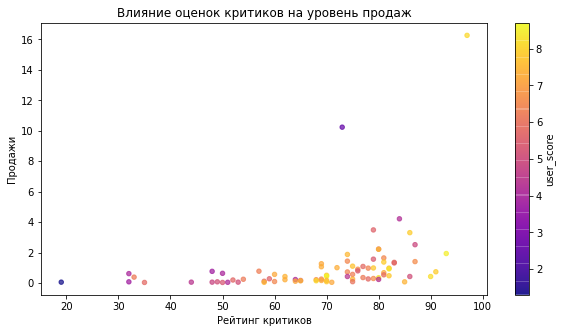

In [43]:
# построим график рассеяния 
df_select.plot.scatter('critic_score',  'total_sales', figsize=(10, 5), alpha=0.7, c='user_score', colormap='plasma', sharex=False)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценок критиков на уровень продаж')
plt.show()

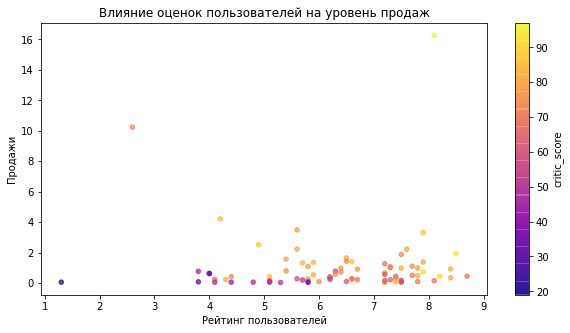

In [44]:
# построим график рассеяния 
df_select.plot.scatter('user_score', 'total_sales', figsize=(10, 5), alpha=0.7, c='critic_score', colormap='plasma', sharex=False)
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценок пользователей на уровень продаж')
plt.show()

В целом распределение ожидаемое, хотя и не линейное - чем выше оценка критиков, тем выше продажи, линейная корреляция сильнее между оценками критиков и продажами, а между продажами и оценками пользователей корреляция не только слабая, но и обратная. Заметно также, что игры с высоким рейтингом у критиков зачастую имеют средние оценки пользователей - и корреляция между оценками средняя. 

В целом, при прогнозе продаж немного надежнее полагаться на отзывы критиков.

Посмотрим на два выброса с продажами более 10 млн.

In [45]:
df_select.query('total_sales > 10')

name platform  year_of_release    genre  na_sales  \
23    Grand Theft Auto V     X360             2013   Action      9.66   
60  Call of Duty: Ghosts     X360             2013  Shooter      6.73   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
23      5.14      0.06         1.41         97.00        8.10      M   
60      2.56      0.04         0.91         73.00        2.60      M   

    total_sales platform_type    company  
23        16.27    stationary  Microsoft  
60        10.24    stationary  Microsoft

GTA V стала многолетним хитом, уже классикой, что видно по продажам и рейтингам. 

Call of Duty: Ghosts, десятый по счету выпуск серии, был ожидаемым релизом, но оказался провальным. На этом примере можно подвергнуть скепсису оценки критиков - даже откровенные провалы могут получать высокие оценки за счет имиджа компании-производителя игры, громкого имени серии и в целом лояльности журналистов.

Посмотрим на величину корреляции для других популярных платформ.

In [46]:
for p in ["Wii", "3DS", "PC", "PS3"]:
    print(p)
    df_select = df.query('platform == @p')
    print(f'Корреляция между оценкой критиков и продажами: {df_select.critic_score.corr(df_select.total_sales):.2}')
    print(f'Корреляция между оценкой пользователей и продажами: {df_select.user_score.corr(df_select.total_sales):.2}')
    print(f'Корреляция между оценками критиков и пользователей: {df_select.critic_score.corr(df_select.user_score):.2}')
    print('--' * 30)

Wii
Корреляция между оценкой критиков и продажами: 0.18
Корреляция между оценкой пользователей и продажами: 0.11
Корреляция между оценками критиков и пользователей: 0.69
------------------------------------------------------------
3DS
Корреляция между оценкой критиков и продажами: 0.35
Корреляция между оценкой пользователей и продажами: 0.22
Корреляция между оценками критиков и пользователей: 0.75
------------------------------------------------------------
PC
Корреляция между оценкой критиков и продажами: 0.26
Корреляция между оценкой пользователей и продажами: 0.013
Корреляция между оценками критиков и пользователей: 0.56
------------------------------------------------------------
PS3
Корреляция между оценкой критиков и продажами: 0.43
Корреляция между оценкой пользователей и продажами: 0.13
Корреляция между оценками критиков и пользователей: 0.63
------------------------------------------------------------


Значения корреляций отличаются, но общий тренд есть. Оценка критиков немного сильнее коррелирует с продажами, хотя эта связь и не является сильной. Корреляция оценок пользователей и продаж совсем слабая. Возможно, это связано и с тем, что далеко не все пользователи пишут отзывы и оставляют оценки.

О связи оценок и продаж трудно говорить и потому, что некоторые игры поставляются эксклюзивно только на одной платформе, например. Или, как в случае Call od Duty, игра является частью большой старой серии, которую люди ждут и покупают из-за имени, репутации. 

Стоит заметить, что некоторые игры, не имея высоких рейтингов, очень хорошо продаются. Их секрет - производитель поставляет их вместе с консолью (Kinect) или контроллером (Wii).

In [47]:
# посмотрим, что же там за бестселлеры
df.query('critic_score < 70 and user_score < 7 and total_sales > 10')

name platform  year_of_release genre  na_sales  eu_sales  \
7             Wii Play      Wii             2006  Misc     13.96      9.18   
14  Kinect Adventures!     X360             2010  Misc     15.00      4.89   

    jp_sales  other_sales  critic_score  user_score rating  total_sales  \
7       2.93         2.84         58.00        6.60      E        28.91   
14      0.24         1.69         61.00        6.30      E        21.82   

   platform_type    company  
7     stationary   Nintendo  
14    stationary  Microsoft

### Жанры игр

Посмотрим, как распределены вышедшие игры по жанрам.

In [48]:
genre_sales = df_actual.pivot_table(index='genre', values='total_sales', columns = 'year_of_release', aggfunc = 'sum', fill_value=0, margins=True).reset_index()
genre_sales = genre_sales[:-1]
genre_sales = genre_sales.rename_axis('index',  axis="columns").set_index('genre').sort_values(by='All', ascending=False)


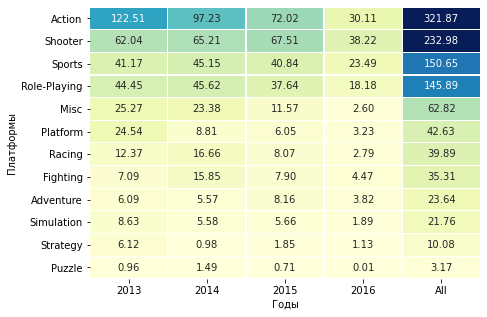

In [49]:
plt.figure(figsize=(7, 5))
sns.heatmap(genre_sales, annot=True, fmt=".2f", cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.xlabel('Годы')
plt.ylabel('Платформы')
plt.show()

Исторически самыми популярными жанрами стали экшен, спортивные игры, шутеры и RPG. Построим для них графики продаж по годам.

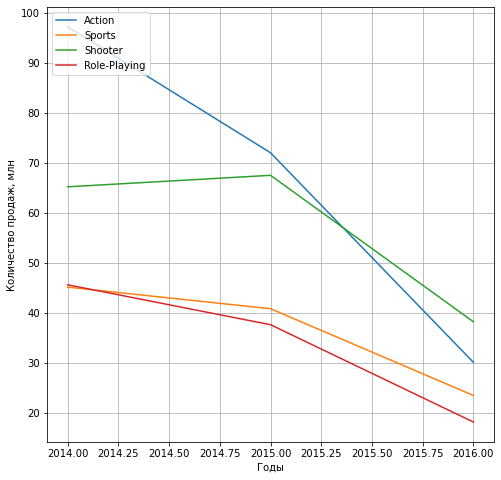

In [50]:
plt.figure(figsize=(8, 8))
for i in ['Action', 'Sports', 'Shooter', 'Role-Playing']:
    plt.plot(genre_sales.loc[i, list(genre_sales.columns[1:-1])].T, label=i)
plt.xlabel('Годы')
plt.ylabel('Количеcтво продаж, млн')
plt.grid()
plt.legend(loc='upper left')
plt.show()

Изменение популярности жанров в целом совпадает с тенденциями рынка - пики их продаж пришлись на вторую половину нулевых, а в последние 6 лет продажи падают во всех жанрах.

Построим диаграммы размаха для всех жанров за последние 7 лет.

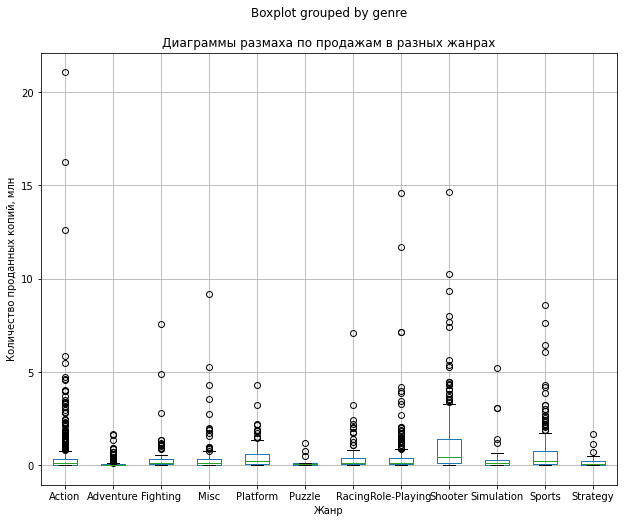

In [51]:
(df_actual[['total_sales', 'genre']].boxplot(column='total_sales', by='genre', figsize=(10,8))
)
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.show()

Из-за многочисленных выбросов сложно разглядеть сами ящики, изменим масштаб графика и соберем статистики в табличку.

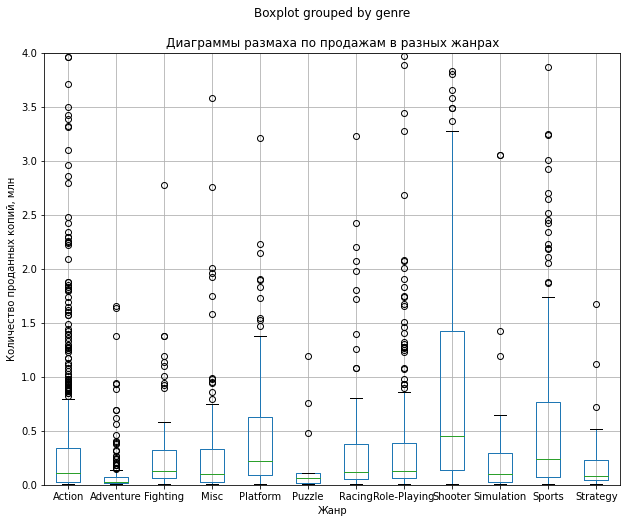

In [52]:
(df_actual[['total_sales', 'genre']].boxplot(column='total_sales', by='genre', figsize=(10,8))
)
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.ylim(0, 4)
plt.show()

In [53]:
display(df_actual
        .pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'mean', 'median', 'std', 'count'])
        .reset_index().sort_values(('median', 'total_sales'), ascending=False))

genre         sum        mean      median         std       count
                 total_sales total_sales total_sales total_sales total_sales
8        Shooter      232.98        1.25        0.45        2.01         187
10        Sports      150.65        0.70        0.24        1.22         214
4       Platform       42.63        0.58        0.22        0.81          74
7   Role-Playing      145.89        0.50        0.12        1.35         292
2       Fighting       35.31        0.44        0.12        1.05          80
6         Racing       39.89        0.47        0.12        0.96          85
0         Action      321.87        0.42        0.11        1.25         766
9     Simulation       21.76        0.35        0.10        0.85          62
3           Misc       62.82        0.41        0.10        1.01         155
11      Strategy       10.08        0.18        0.08        0.28          56
5         Puzzle        3.17        0.19        0.06        0.33          17
1      Adventure       23.64        0.10        0.03        0.22         245

In [54]:
for g in ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform']:
    с = df_actual[(df_actual['genre'] == g) & (df_actual['total_sales'] > 2)]['total_sales'].count()
    print(f'Жанр {g}, количество бестселлеров - {с}, доля хитов от общего числа релизов {(с/df_actual[df_actual["genre"] == g]["total_sales"].count()):.2}')

Жанр Action, количество бестселлеров - 31, доля хитов от общего числа релизов 0.04
Жанр Sports, количество бестселлеров - 22, доля хитов от общего числа релизов 0.1
Жанр Shooter, количество бестселлеров - 35, доля хитов от общего числа релизов 0.19
Жанр Role-Playing, количество бестселлеров - 13, доля хитов от общего числа релизов 0.045
Жанр Platform, количество бестселлеров - 4, доля хитов от общего числа релизов 0.054


Из этих данных видно, что экшны лидеры по количеству релизов и валовым продажам, но по медианым продажам даже не входят в пятерку, шутеры в лидерах и по средним продажам, и по доле бестселлеров среди выпущенных игр.  Также среди лидеров спортивные игры и платформеры.

### Выводы

В среднем жизненный цикл платформы составляет около 10 лет. 

На данный момент среди консолей PlayStation 4, WiiU, XBox One находятся на подъеме, Nintendo 3DS, XBox 360, PlayStation 3 и PlayStation Vita миновали пик популярности. Персональные компьютеры, никогда не являясь лидерами по продажам, занимают небольшую стабильную нишу. 

Наиболее популярными жанрами являются спортивные игры, шутеры, платформеры и RPG. Несмотря на огромное количество релизов, экшены не являются лидерами по продажам и редко "выстреливают". 

## Различия в регионах

Составим портреты пользователя для отдельных регионов (Северная Америка, Европа, Япония). 

### Популярные платформы

Составим топ-5 платформ для каждого региона и сравним с топами компаний-производителей за последние 10 лет.

In [55]:
html_str = ''
s1 = (
    df_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False).head()
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s1}</td>'
s2 = (
    df_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False).head()
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s2}</td>'
s3 = (
    df_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False).head()
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s3}</td>'
display_html(html_str, raw = True)

<ipython-input-55-308be53f120e>:3: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  df_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum')
<ipython-input-55-308be53f120e>:9: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  df_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
<ipython-input-55-308be53f120e>:15: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  df_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum')


na_sales 
 
 
 platform 
   
 
 
 
 
 PS4 
 108.740000 
 
 
 XOne 
 93.120000 
 
 
 X360 
 81.660000 
 
 
 PS3 
 63.500000 
 
 
 3DS 
 38.200000 
 
 
 
 
 
 
 
   
 eu_sales 
 
 
 platform 
   
 
 
 
 
 PS4 
 141.090000 
 
 
 PS3 
 67.810000 
 
 
 XOne 
 51.590000 
 
 
 X360 
 42.520000 
 
 
 3DS 
 30.960000 
 
 
 
 
 
 
 
   
 jp_sales 
 
 
 platform 
   
 
 
 
 
 3DS 
 67.810000 
 
 
 PS3 
 23.350000 
 
 
 PSV 
 18.590000 
 
 
 PS4 
 15.960000 
 
 
 WiiU 
 10.880000

In [56]:
html_str = ''
s1 = (
    df_actual.pivot_table(index='company', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False).head()
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s1}</td>'
s2 = (
    df_actual.pivot_table(index='company', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False).head()
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s2}</td>'
s3 = (
    df_actual.pivot_table(index='company', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False).head()
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s3}</td>'
display_html(html_str, raw = True)

<ipython-input-56-4618c034c166>:3: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  df_actual.pivot_table(index='company', values='na_sales', aggfunc='sum')
<ipython-input-56-4618c034c166>:9: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  df_actual.pivot_table(index='company', values='eu_sales', aggfunc='sum')
<ipython-input-56-4618c034c166>:15: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  df_actual.pivot_table(index='company', values='jp_sales', aggfunc='sum')


na_sales 
 
 
 company 
   
 
 
 
 
 Sony 
 177.280000 
 
 
 Microsoft 
 174.780000 
 
 
 Nintendo 
 74.540000 
 
 
 PC 
 11.110000 
 
 
 
 
 
 
 
   
 eu_sales 
 
 
 company 
   
 
 
 
 
 Sony 
 215.170000 
 
 
 Microsoft 
 94.110000 
 
 
 Nintendo 
 57.590000 
 
 
 PC 
 25.360000 
 
 
 
 
 
 
 
   
 jp_sales 
 
 
 company 
   
 
 
 
 
 Nintendo 
 78.740000 
 
 
 Sony 
 61.190000 
 
 
 Microsoft 
 0.850000 
 
 
 PC 
 0.000000

In [57]:
html_str = ''
s1 = (
    df_actual.pivot_table(index='platform_type', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s1}</td>'
s2 = (
    df_actual.pivot_table(index='platform_type', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s2}</td>'
s3 = (
    df_actual.pivot_table(index='platform_type', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s3}</td>'
display_html(html_str, raw = True)

<ipython-input-57-0b1133222d2b>:3: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  df_actual.pivot_table(index='platform_type', values='na_sales', aggfunc='sum')
<ipython-input-57-0b1133222d2b>:9: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  df_actual.pivot_table(index='platform_type', values='eu_sales', aggfunc='sum')
<ipython-input-57-0b1133222d2b>:15: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  df_actual.pivot_table(index='platform_type', values='jp_sales', aggfunc='sum')


na_sales 
 
 
 platform_type 
   
 
 
 
 
 stationary 
 382.790000 
 
 
 mobile 
 43.810000 
 
 
 PC 
 11.110000 
 
 
 
 
 
 
 
   
 eu_sales 
 
 
 platform_type 
   
 
 
 
 
 stationary 
 328.790000 
 
 
 mobile 
 38.080000 
 
 
 PC 
 25.360000 
 
 
 
 
 
 
 
   
 jp_sales 
 
 
 platform_type 
   
 
 
 
 
 mobile 
 89.690000 
 
 
 stationary 
 51.090000 
 
 
 PC 
 0.000000

In [58]:
# объединим данные по продажам по фирмам-производителям и типам платформ
df_actual.groupby(['company', 'platform_type', 'platform'])[['na_sales', 'eu_sales','jp_sales']].sum().style.background_gradient()

В Европе и Северной Америке топ-5 плаформ состоит из одинаковых консолей, хотя и в разном порядке - XBox 360, XOne, 3DS, PlayStation 3 и PlayStation 4, причем первые 4 места занимают стационарные консоли. И там, и там относительно свежая PlayStation4 уже набрала популярность. В Японии Xbox 360 даже не вошла в топ, лидер - мобильная консоль Nintendo и всего в топе 2 из 5 - мобильные гаджеты. Продаж игр для ПК в Японии нет совсем. 

Заметны отличия и в целом по производителям - в Японии Micfosoft в разы отстает от Nintendo - возможно, дело в том, что Microsof вообще не производит мобильных консолей, а этот форм-фактор в Японии самый популярный, или дело в патриотических предпочтениях - Nintendo и Sony японские корпорации.

### Популярные жанры

Составим топ-5 жанров для каждого региона за последние 10 лет.

In [59]:
html_str = ''
s1 = (
    df_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False).head()
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s1}</td>'
s2 = (
    df_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False).head()
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s2}</td>'
s3 = (
    df_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False).head()
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s3}</td>'
display_html(html_str, raw = True)

<ipython-input-59-7028e09ce407>:3: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  df_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum')
<ipython-input-59-7028e09ce407>:9: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  df_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
<ipython-input-59-7028e09ce407>:15: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  df_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum')


na_sales 
 
 
 genre 
   
 
 
 
 
 Action 
 126.050000 
 
 
 Shooter 
 109.740000 
 
 
 Sports 
 65.270000 
 
 
 Role-Playing 
 46.400000 
 
 
 Misc 
 27.490000 
 
 
 
 
 
 
 
   
 eu_sales 
 
 
 genre 
   
 
 
 
 
 Action 
 118.130000 
 
 
 Shooter 
 87.860000 
 
 
 Sports 
 60.520000 
 
 
 Role-Playing 
 36.970000 
 
 
 Racing 
 20.190000 
 
 
 
 
 
 
 
   
 jp_sales 
 
 
 genre 
   
 
 
 
 
 Role-Playing 
 51.040000 
 
 
 Action 
 40.490000 
 
 
 Misc 
 9.200000 
 
 
 Fighting 
 7.650000 
 
 
 Shooter 
 6.610000

В Европе и Северной Америке лидируют экшены, спортивные игры и шутеры. В Японии экшены только на втором месте по популярности, лидеры - RPG, а шутеры всего на 5 месте. 

Можно сделать вывод, что пользователи в Европе и Америке более азартны и воинственны, а японцам более свойственнен эскапизм. Вероятно, это следствие культурных особенностей, причины которых скорее всего исторические и религиозные.

### Влияние рейтинга ESRB

Посмотрим, как влияет рейтинг ESRB на продажи игр в различных регионах.

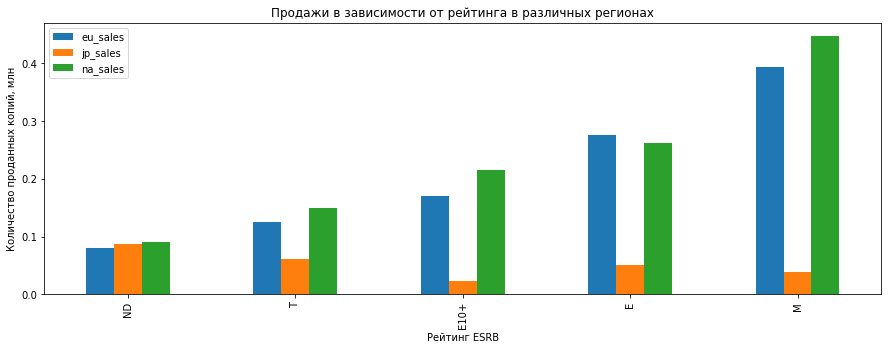

In [60]:
(
    df_actual.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='mean')
    .sort_values(by='na_sales')
    .plot(kind='bar', figsize=(15, 5))
)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество проданных копий, млн')
plt.title('Продажи в зависимости от рейтинга в различных регионах')
plt.show()

Топ самых продаваемых категорий в Америке и Европе совпадает. Больше всего продаются игры с рейтингом "для взрослых (старше 16 лет)". Следом идут игры для всех - игры, которые имеют самую широкую аудиторию, могут быть интересны как детям, так и взрослым, затем игры для школьников и подростков.

Рейтинг ESRB предназначен для рецензирования игр на территории Северной Америки (США, Канады, Мексики). Поэтому в Японии так популярны игры вовсе без этого рейтинга - судя по всему, это игры, созданные в Японии и не получавшие рейтинга, но популярные на своей родине. 

### Выводы 

Региональные особенности влияют и на то, какие жанры популярны, и какие платформы. 

В Европе и Северной Америке лидеры отличаются незначительно: наиболее популярны стационарные платформы - XBox 360, XOne, PlayStation 3 и PlayStation 4. В Японии же в топе мобильные консоли - Nintendo 3DS и PlayStation Vita, но стационарные PlayStation 3 и PlayStation 4 также популярны. Продаж игр для ПК в Японии согласно имеющимся данным нет совсем. 

В Европе и Северной Америке лидируют экшены, спортивные игры и шутеры. В Японии экшены только на втором месте по поулярности, лидеры - RPG, а шутеры всего на 5 месте. 

## Проверка гипотез

###  Гипотеза 1

Проверим, отличаются ли средние пользовательские рейтинги платформ Xbox One и PC. Нулевая гипотеза - **"средние рейтинги не отличаются"**.

Значение критического уровня вероятности (альфа) примем равным 5%.

Пропущенные значечния отфильтруем.

In [61]:
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(
    df_actual[(df_actual.platform == "XOne") & (df_actual.user_score.notna())]['user_score'], 
    df_actual[(df_actual.platform == "PC") & (df_actual.user_score.notna())]['user_score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

display(df_actual.query('platform in ["XOne", "PC"]')
        .pivot_table(index='platform', values='user_score', aggfunc=['count', 'mean', 'median', 'var']))

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


count       mean     median        var
         user_score user_score user_score user_score
platform                                            
PC              155       6.27       6.80       3.04
XOne            182       6.52       6.80       1.91

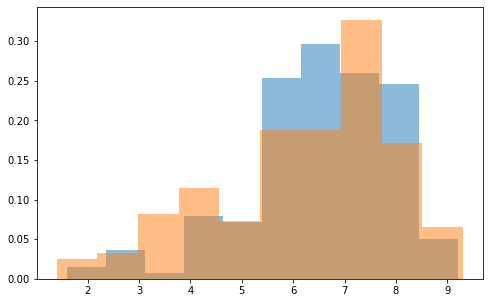

In [62]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df_actual[(df_actual.platform == "XOne") & (df_actual.user_score.notna())]['user_score'], bins=10, density=True, alpha=0.5)
ax.hist(df_actual[(df_actual.platform == "PC") & (df_actual.user_score.notna())]['user_score'], bins=10, density=True, alpha=0.5)
plt.show()

Хотя получившееся p-value не столь велико, вероятность получить такие значения статистически мала. Оценки пользователей на этих платформах не отличаются.

###  Гипотеза 2

Проверим, отличаются ли средние пользовательские рейтинги жанров Экшен и Спорт. Нулевая гипотеза - **"средние рейтинги не отличаются"**.

Значение критического уровня вероятности (альфа) примем равным 5%.

Пропущенные значечния отфильтруем.

In [63]:
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(
    df_actual[(df_actual.genre == "Action") & (df_actual.user_score.notna())]['user_score'], 
    df_actual[(df_actual.genre == "Sports") & (df_actual.user_score.notna())]['user_score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    
display(df_actual.query('genre in ["Action", "Sports"]')
        .pivot_table(index='genre', values='user_score', aggfunc=['count', 'mean', 'median', 'var']))

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


count       mean     median        var
       user_score user_score user_score user_score
genre                                             
Action        389       6.84       7.10       1.77
Sports        160       5.24       5.50       3.18

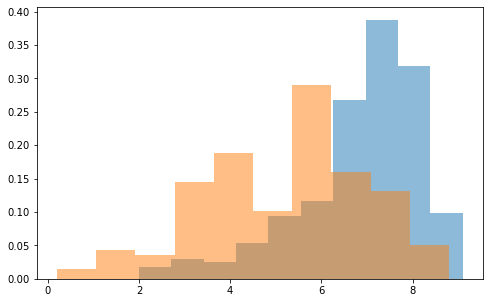

In [64]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df_actual[(df_actual.genre == "Action") & (df_actual.user_score.notna())]['user_score'], bins=10, density=True, alpha=0.5)
ax.hist(df_actual[(df_actual.genre == "Sports") & (df_actual.user_score.notna())]['user_score'], bins=10, density=True, alpha = 0.5)
plt.show()

Так как принятый критический уровень вероятности 5%, гипотезу следует отвергнуть как маловероятную. Оценки пользователей на этих платформах отличаются.

### Выводы 

Оценки пользователей не зависят от платформ, но зависят от жанров игр. На основании принятого нами значения критического уровня статистической значимости 5% мы можем предполагать, что первая гипотеза верна, а вторая нет.

## Общий вывод.

Мы изучили выборку данных об видеоиграх, вышедших с 1980 по 2016 годы на различных платформах - консолях и персональных компьютерах. На основе этих данных мы выяснили, какие игры могут хорошо продаваться в 2017 году и составили портреты пользователей разных регионов.

К 2016 году PlayStation 4, WiiU, XBox One находятся на подъеме, Nintendo 3DS, XBox 360, PlayStation 3 и PlayStation Vita миновали пик популярности, причем PlayStation Vita на протяжении всей жизни не пользовалась большой популярностью.

Среди жанров наиболее продаваемыми являются спортивные игры, шутеры и RPG и платформеры. 

Региональные отличия заметны как в выборе пользователями игровых платформ, так и жанров, при этом Северная Америка и Европа более схожи между собой, а Япония заметно отличается. 

Так, наиболее популярными платформами в Северной Америке и Европе являются стационарные консоли - XBox 360, XOne, PlayStation 3 и PlayStation 4. В Японии в лидерах мобильная консоль - Nintendo 3DS, а PlayStation3 на втором месте. Среди жанров в Европе и Америке наиболее популярны экшены, спортивные игры и шутеры. В Японии экшены только на втором месте по популярности, лидеры - RPG.

Так как рейтинг ESRB предназначен для рецензирования игр на территории Северной Америки (США, Канады, Мексики), заметнее его влияние в этом регионе и Европе. В Японии популярны игры вовсе без этого рейтинга - судя по всему, это игры, созданные в самой Японии и не получавшие этого рейтинга.

Продажи игр сильнее коррелируют с оценкой критиков, чем с оценками пользователей. При этом оценки пользователкй зависят не от платформы, а от жанра. 